# Model Deployment Final Exam
## Calista Lianardi - 2702325880 - LA09

### Preprocessing for Dataset B 

In [83]:
# Basic Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

# Evaluation & Analysis
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

**Exploratory Data Analysis**

In [86]:
df = pd.read_csv('ObesityDataSet2.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [88]:
#Checking the datatype and null content 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

Several variables are found with null values:
- **FCVC** which is a numerical variable
- **MTRANS** which  a categorical variable

we might need to impute that below

In [91]:
#To check the excact number of missing value

df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [92]:
#Checking the percentage of missing value to determine drop or impute

missing = df.isnull().mean() * 100
for col, pct in missing.items():
    if pct > 0:
        print(f"{col}: {pct:.2f}%")

FCVC: 3.50%
MTRANS: 2.46%


As the missing value are very low (e.g. <5%), we can still safely do imputation for these columns

In [96]:
# Checking the summary statistic for numeric columns

df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [97]:
#Checking duplicated value

df.duplicated().sum()

10

Here we also found duplicated data, which might not be a good sign for our data, thus might as well drop them out

In [101]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [103]:
#Identifying and exploring the categoricla variable

cat_col = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_col)

print()

#Checking the unique values for each category
for col in cat_col:
    print(df[col].value_counts())

['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

Gender
Male      526
Female    520
Name: count, dtype: int64
Age
21          121
23          118
18          106
26          102
19           79
22           72
20           69
24           42
17           36
25           35
30           29
31           29
38           23
27           21
33           19
34           15
32           14
29           13
37           11
16           11
39           11
41            9
35            9
28            9
40            8
21 years      4
44            3
55            3
19 years      2
46            2
22 years      2
23 years      2
45            2
36            2
42            2
43            1
48            1
51            1
33 years      1
17 years      1
26 years      1
36 years      1
15            1
20 years      1
25 years      1
14            1
Name: count, dtype: int64
family_history_with_overweight
yes    860
no     186
Nam

Here we can identify anomalies found in the categorical data, but we notice we have age here which shouldn't be a categorical data. but this is happen due to existence of anomalies found in the column. thus we need to handle this first before proceeding to modeling and plotting the numerical variable because we do not want to miss this one out

In [105]:
# Simple anomaly handling

#step 1: convert all values to str and remove non numeric characters
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)').astype(int)

#Step 2: inspect the result
print(sorted(df['Age'].unique()))

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 51, 55]


All set! now we can proceed to do numerical value exploration and correlation

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


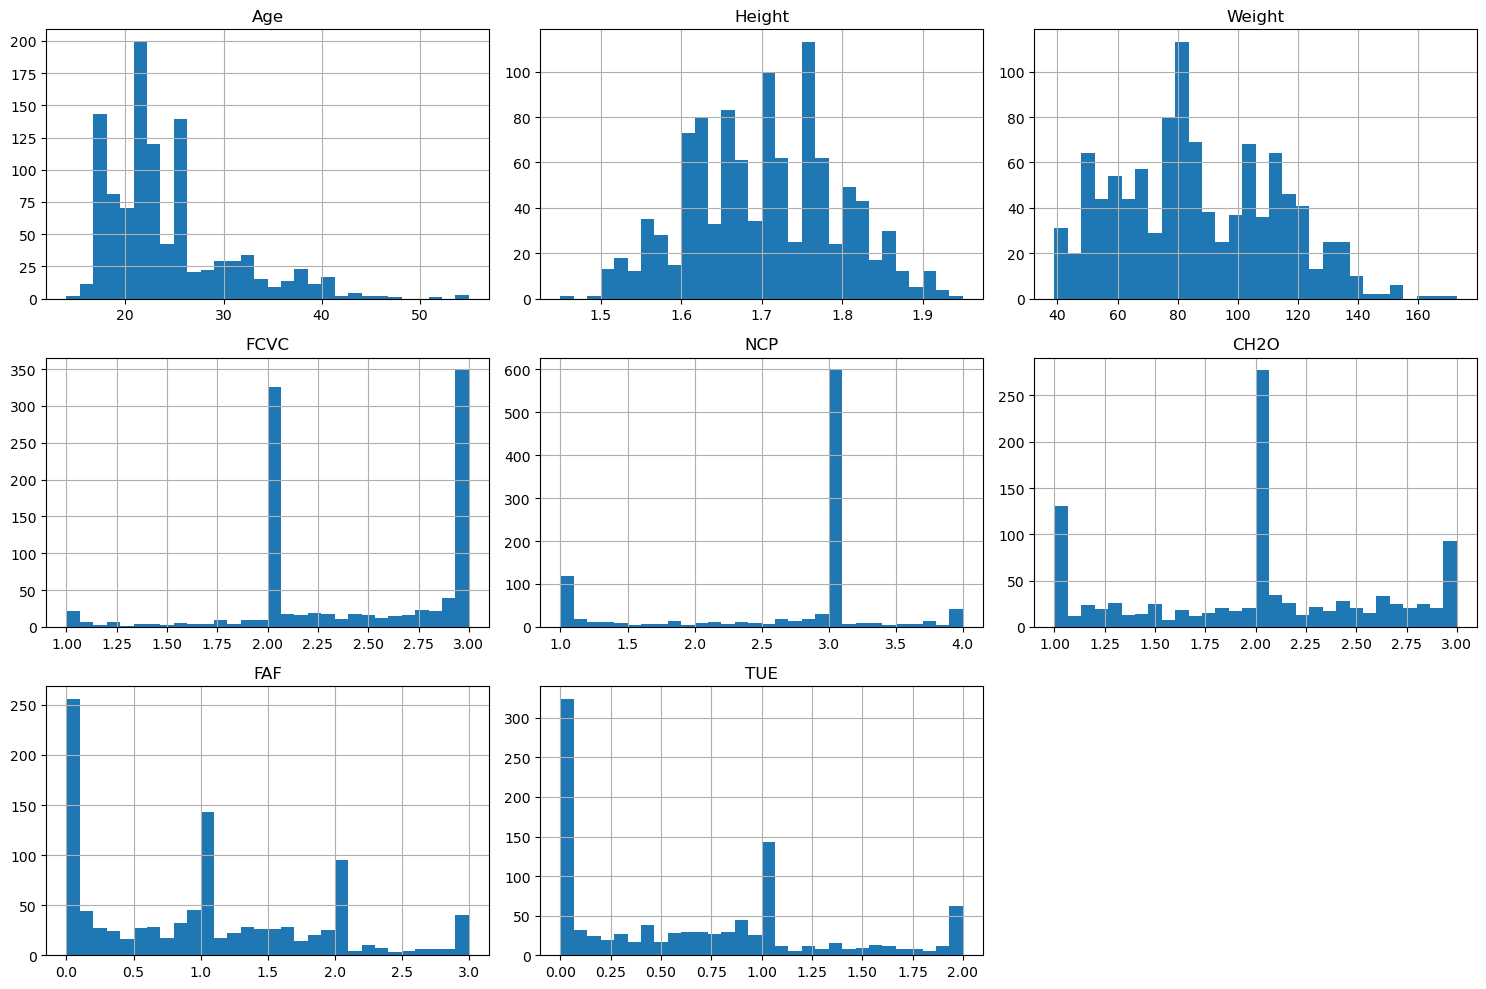

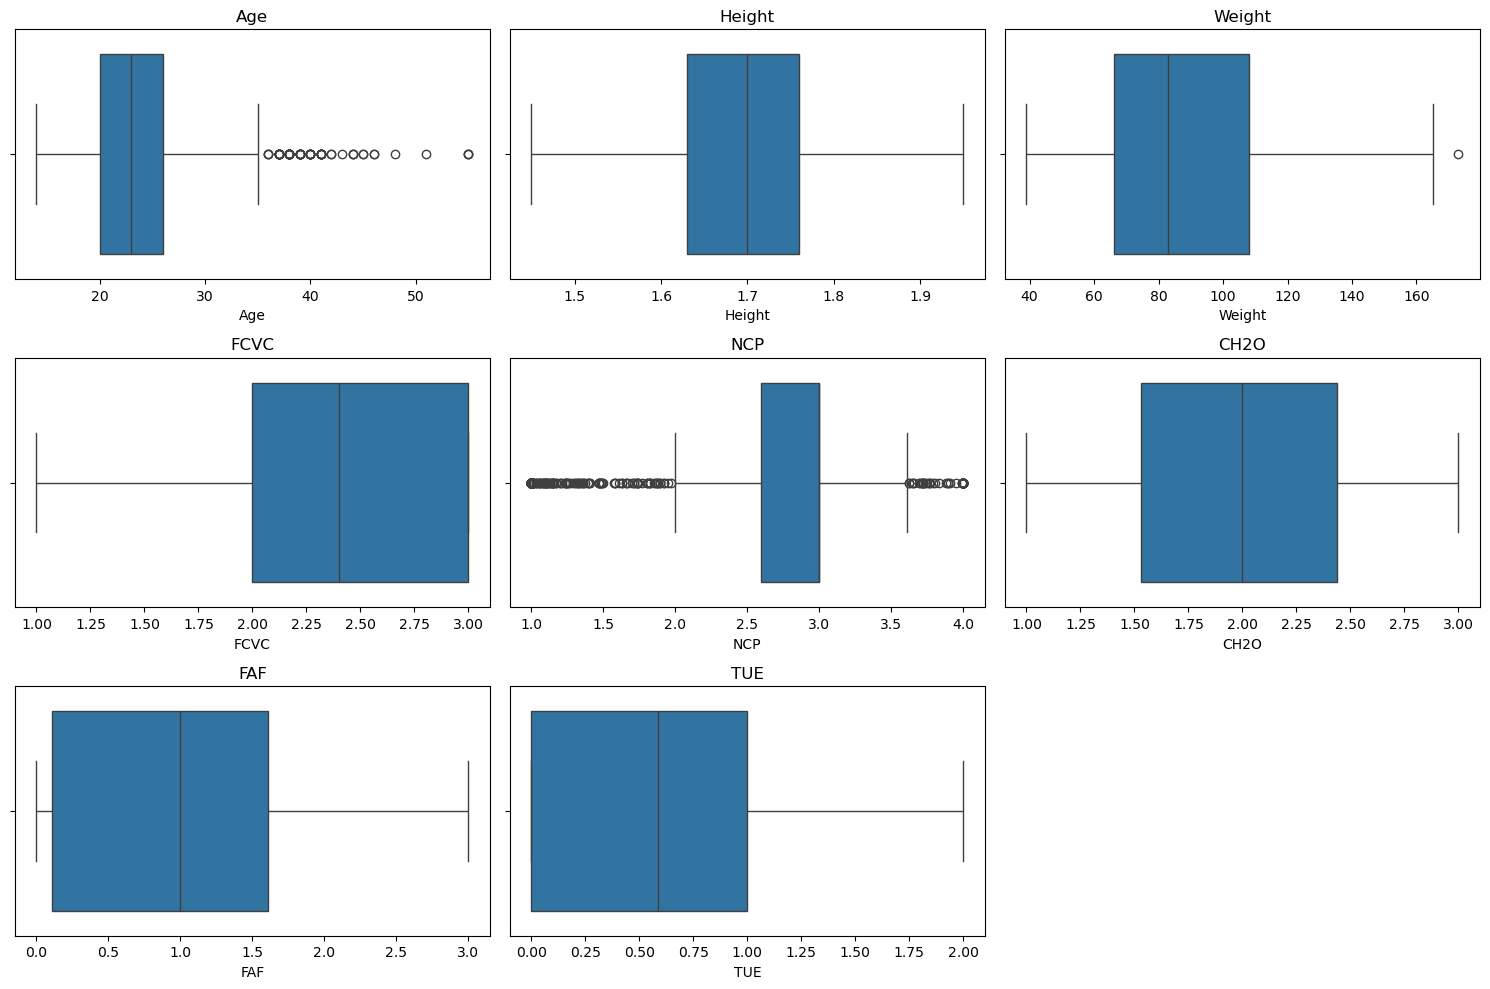

In [109]:
# Identifying and exploring the numerical variable
num_col = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_col)

# Plot histograms for each numerical column
df[num_col].hist(bins=30, figsize=(15, 10), layout=(len(num_col)//3+1, 3))
plt.tight_layout()
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for idx, col in enumerate(num_col):
    plt.subplot((len(num_col) // 3) + 1, 3, idx + 1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


Another anomaly is found in the FCVC, NCP, CH2O, FAF, and TUE. we can see that in the data description, it suppose to reflect respondent daily habits or discrete choice, such as we cannot have 1.5 main meal a day, or 2.8 physical activities. This might be a sign of bad data entry, which might happen if the form allowed sliders not likert radio, and this original scale must've been intended to be ordinal. It also seems like the occurence of float number is much lesser than the round number, which could also indicate unintended input. thus we need to round this up 

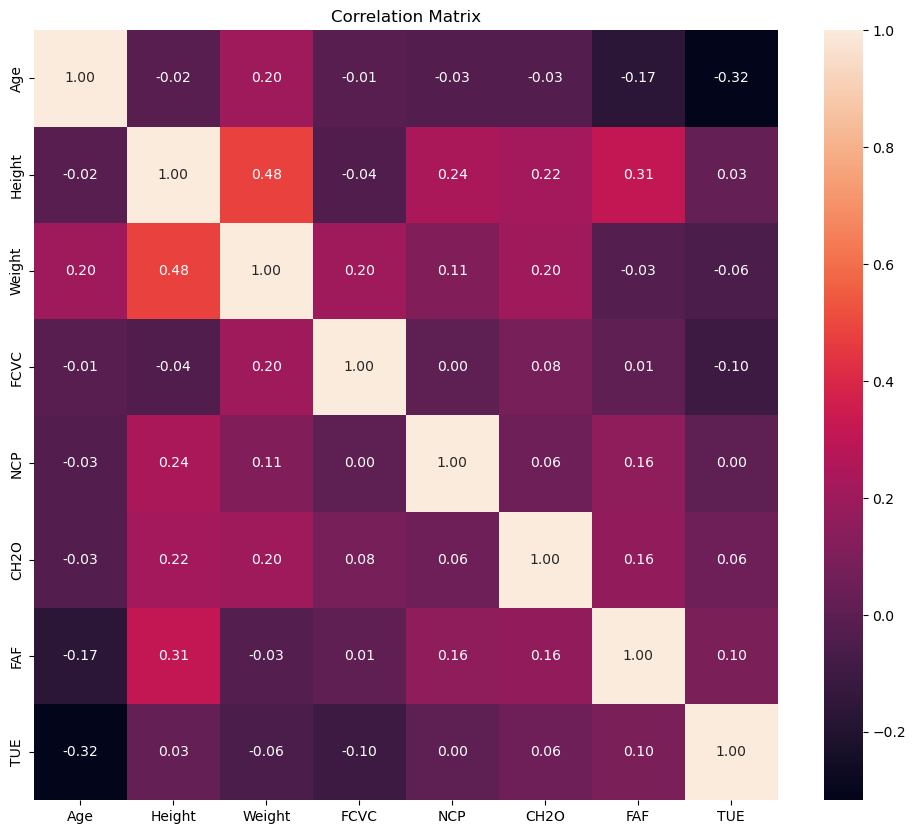

In [111]:
#Bivariate analysis (correlation matrix) for the numerical variable

plt.figure(figsize=(12, 10))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**PreProccessing (with help of pipeline)**

In [113]:
# Defining the preprocessing function class

class PreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.gender_map = {'male': 0, 'female': 1}
        self.family_map = {'yes': 1, 'no': 0}
        self.favc_map = {'yes': 1, 'no': 0}
        self.caec_map = {'no': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}
        self.smoke_map = {'yes': 1, 'no': 0}
        self.scc_map = {'yes': 1, 'no': 0}
        self.calc_map = {'no': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}
        self.mtrans_map = {
            'public_transportation': 0,
            'walking': 1,
            'automobile': 2,
            'motorbike': 3,
            'bike': 4
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Normalize text columns
        for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']:
            X[col] = X[col].astype(str).str.strip().str.lower()

        # Fix Age format
        X['Age'] = X['Age'].astype(str).str.extract(r'(\d+)').astype(float)

        # Fill missing values
        X['FCVC'] = X['FCVC'].fillna(X['FCVC'].median())
        X['MTRANS'] = X['MTRANS'].fillna(X['MTRANS'].mode()[0])

        # Apply mappings
        X['Gender'] = X['Gender'].map(self.gender_map)
        X['family_history_with_overweight'] = X['family_history_with_overweight'].map(self.family_map)
        X['FAVC'] = X['FAVC'].map(self.favc_map)
        X['CAEC'] = X['CAEC'].map(self.caec_map)
        X['SMOKE'] = X['SMOKE'].map(self.smoke_map)
        X['SCC'] = X['SCC'].map(self.scc_map)
        X['CALC'] = X['CALC'].map(self.calc_map)
        X['MTRANS'] = X['MTRANS'].map(self.mtrans_map)

        return X

In [114]:
# Also map the target input (should be differently i explain in vid why differently)

target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['NObeyesdad'] = df['NObeyesdad'].map(target_mapping)


In [115]:
# Define X and Y variable and prep for train test split
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

All is set! now let's do the modeling!

**Modeling using Randomforest & XGBoost**

In [118]:
# Do the random forest with the help of almighty pipeline

rf_pipeline = Pipeline([
    ('preprocessing', PreProcessor()),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', PreProcessor()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [119]:
# Evaluating the performance

y_pred_rf = rf_pipeline.predict(X_test)
print("RandomForest Report:")
print(classification_report(y_test, y_pred_rf))

RandomForest Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       0.88      0.90      0.89        41
           2       0.90      0.86      0.88        22
           3       0.92      0.80      0.86        30
           4       0.87      0.92      0.89        36
           5       0.96      0.96      0.96        27
           6       1.00      1.00      1.00        28

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



In [120]:
# Now let's model XGBoost 

xgb_pipeline = Pipeline([
    ('preprocessing', PreProcessor()),
    ('classifier', XGBClassifier(eval_metric='mlogloss'))
])

xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', PreProcessor()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='mlogloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [121]:
# Evaluating the performance of XGBoost

y_pred_xgb = xgb_pipeline.predict(X_test)
print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.93      0.95      0.94        41
           2       0.77      0.77      0.77        22
           3       0.89      0.80      0.84        30
           4       0.85      0.97      0.91        36
           5       1.00      0.93      0.96        27
           6       1.00      1.00      1.00        28

    accuracy                           0.92       210
   macro avg       0.92      0.91      0.92       210
weighted avg       0.92      0.92      0.92       210



Here both model give us 92% of accuracy, but Random Forest seem slightly better it, but let see the importance of each feature

In [123]:
# Checking the feature importance

# First let's do random forrest
rf_model = rf_pipeline.named_steps['classifier']
preprocessor = PreProcessor()
X_cleaned_rf = preprocessor.transform(X)
feature_names_rf = X_cleaned_rf.columns
importances = rf_model.feature_importances_


# And for XGBOost
xgb_model = xgb_pipeline.named_steps['classifier']
importances_xgb = xgb_model.feature_importances_

In [124]:
# Define the plot function
def plot_feature_importance(importances, feature_names, title):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()

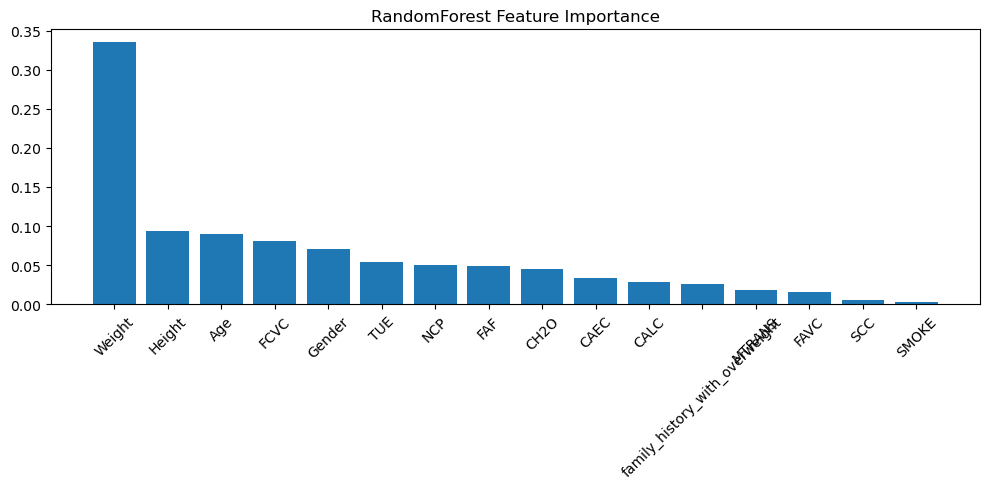

In [125]:
#Plot for Randomforest

plot_feature_importance(importances, feature_names_rf, "RandomForest Feature Importance")

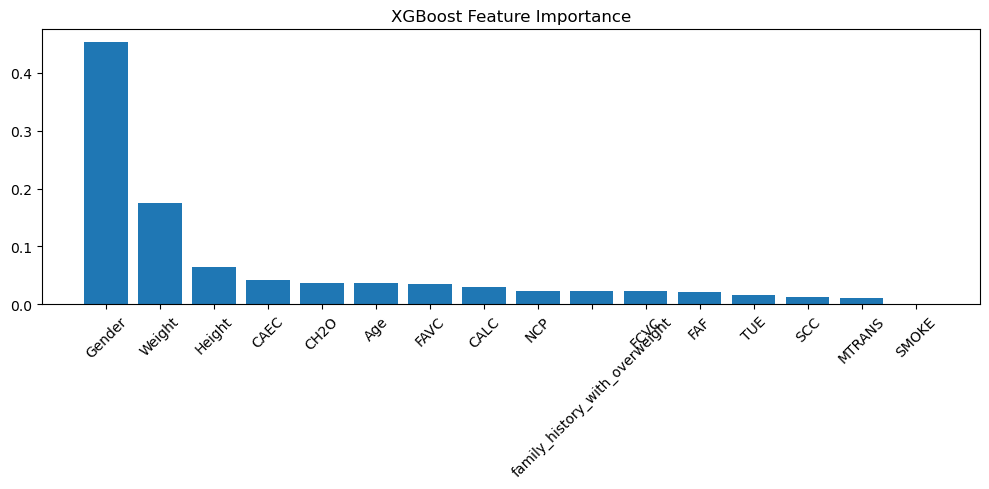

In [126]:
#Plot for XGBOOST

plot_feature_importance(importances_xgb, feature_names_rf, "XGBoost Feature Importance")

Here we can see that, after we know that random forest model is slightly better than XGBoost, we can also see the importance of feature for both model

For Random Forest, the top are
1. Weight
2. Height
3. Age
4. Veggies intake frequency
5. Gender
6. Technology usage frequency
7. Main meal per day
8. Physical activities frequency
9. daily water intake
10. Snacking frequency
11. Alchohol intake frequency
12. Overweight history on family
13. Transportation used
14. Frequency of high calories food intake
15. Focusing on calories intake
16. Smoking

But for XGBoost the top are 
1. Gender
2. Weight
3. Height
4. Snacking frequency
5. daily water intake
6. Age
7. Frequency of high calories food intake
8. Alcohol intake frequency
9. Main meal per day
10. Overweight history on family
11. Veggies intake frequency
12. Physical activities frequency
13. Technology usage frequency
14. Focusing on calories intake
15. Transportation used
16. Smoking


Based on this observation, supported by our best model is random forest, we will take the random forest feature into our focus. and trying to retrain random forest with the top 10 feature. 

**WHY?**
We can see that not only performed better, randoom forest feature is most likely the user friendly information needed, such as personal information and the information the user can control in plain sight. If we take a look at XGBoost, including "Frequency of high calories food intake" and "Family history of overweight" might not be user friendly information, as not every user understand about calories in their food and wether their family have obesity or not. so the random forest feature is what are we gonna use today

In [128]:
# Retrain the model for RandomForest with 10 most importance and correlated feature

# Define the new X 
selected_features = ['Gender', 'Age', 'Height', 'Weight', 'NCP', 'CAEC', 'FCVC', 'CH2O', 'FAF', 'TUE']

X_new = df[selected_features]
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

In [129]:
# Redefine new preprocessor pipeline for only this feature

from PreProcessorNew_pipeline import PreProcessorNew

In [131]:
#retrain the model

rf_pipeline_new = Pipeline([
    ('preprocessing', PreProcessorNew()),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline_new.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', PreProcessorNew()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [136]:
# Evaluating the performance of new random forest

y_pred_rf = rf_pipeline_new.predict(X_test)
print("Newest RandomForest Report:")
print(classification_report(y_test, y_pred_rf))

Newest RandomForest Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       0.97      0.88      0.92        41
           2       0.81      0.95      0.88        22
           3       0.86      0.80      0.83        30
           4       0.89      0.89      0.89        36
           5       1.00      0.96      0.98        27
           6       1.00      1.00      1.00        28

    accuracy                           0.92       210
   macro avg       0.92      0.93      0.92       210
weighted avg       0.92      0.92      0.92       210



Dan yap, the accuracy did not change, but slight macroavg on the recall there seems having slight improvement, can also see by each class f1 score that much improved in the newest model, so feature importance might help us here!

In [149]:
# Saving the model into pickle

with open("ObessityRF.pkl", "wb") as f:
    pickle.dump(rf_pipeline_new, f)